<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/yelp_inc_yelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  yfinance

     |████████████████████████████████| 5.5MB 8.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=affd3ad8fba05c949eba4c01bb93b77ea7bf593691fd37e49d9733e006c2fb20
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

In [3]:
YELP = "YELP" 

In [4]:
YELP = yfinance.download(YELP)

YELP

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-02,22.010000,26.000000,22.000000,24.580000,24.580000,4809400
2012-03-05,24.850000,24.860001,20.900000,20.990000,20.990000,2988200
2012-03-06,19.830000,20.500000,19.360001,20.500000,20.500000,1154300
2012-03-07,20.450001,20.629999,19.950001,20.250000,20.250000,444800
2012-03-08,20.299999,20.389999,19.959999,20.000000,20.000000,436900
...,...,...,...,...,...,...
2020-11-16,30.299999,30.670000,29.370001,30.629999,30.629999,1438300
2020-11-17,29.910000,30.340000,29.770000,29.959999,29.959999,888900
2020-11-18,30.010000,31.490000,29.920000,30.889999,30.889999,1276800


In [5]:
YELP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-02,22.010000,26.000000,22.000000,24.58,24.58,4809400
2012-03-05,24.850000,24.860001,20.900000,20.99,20.99,2988200
2012-03-06,19.830000,20.500000,19.360001,20.50,20.50,1154300
2012-03-07,20.450001,20.629999,19.950001,20.25,20.25,444800
2012-03-08,20.299999,20.389999,19.959999,20.00,20.00,436900


In [6]:
YELP.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-16,30.299999,30.670000,29.370001,30.629999,30.629999,1438300
2020-11-17,29.910000,30.340000,29.770000,29.959999,29.959999,888900
2020-11-18,30.010000,31.490000,29.920000,30.889999,30.889999,1276800
2020-11-19,30.610001,32.209999,30.610001,31.840000,31.840000,1218400
2020-11-20,31.340000,32.910000,31.000000,32.220001,32.220001,1345900


In [7]:
YELP.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2.197000e+03
mean,38.376723,39.161784,37.585061,38.366982,38.366982,2.327483e+06
std,16.384774,16.682034,16.008232,16.322905,16.322905,2.736659e+06
min,14.490000,15.260000,12.890000,14.460000,14.460000,1.798000e+05
25%,25.340000,25.990000,24.709999,25.320000,25.320000,1.056700e+06
50%,34.930000,35.430000,34.400002,34.869999,34.869999,1.655200e+06
75%,45.020000,45.820000,44.360001,45.070000,45.070000,2.641400e+06
max,99.800003,101.750000,97.250000,98.040001,98.040001,4.715500e+07


In [8]:
YELP.info

<bound method DataFrame.info of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.220001  1

In [9]:
YELP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2197 entries, 2012-03-02 to 2020-11-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2197 non-null   float64
 1   High       2197 non-null   float64
 2   Low        2197 non-null   float64
 3   Close      2197 non-null   float64
 4   Adj Close  2197 non-null   float64
 5   Volume     2197 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 120.1 KB


In [10]:
conn = sqlite3.connect("YELP.db")
c = conn.cursor()

In [11]:
conn = sqlite3.connect("YELP.db")
c = conn.cursor()

In [12]:
YELP.to_sql("YELP", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [13]:
#See data
c.execute("""SELECT * FROM YELP""")
rows = c.fetchall()
rows

[('2012-03-02 00:00:00',
  22.010000228881836,
  26.0,
  22.0,
  24.579999923706055,
  24.579999923706055,
  4809400),
 ('2012-03-05 00:00:00',
  24.850000381469727,
  24.860000610351562,
  20.899999618530273,
  20.989999771118164,
  20.989999771118164,
  2988200),
 ('2012-03-06 00:00:00',
  19.829999923706055,
  20.5,
  19.360000610351562,
  20.5,
  20.5,
  1154300),
 ('2012-03-07 00:00:00',
  20.450000762939453,
  20.6299991607666,
  19.950000762939453,
  20.25,
  20.25,
  444800),
 ('2012-03-08 00:00:00',
  20.299999237060547,
  20.389999389648438,
  19.959999084472656,
  20.0,
  20.0,
  436900),
 ('2012-03-09 00:00:00',
  20.0,
  20.100000381469727,
  19.5,
  19.799999237060547,
  19.799999237060547,
  668200),
 ('2012-03-12 00:00:00',
  19.799999237060547,
  22.489999771118164,
  19.520000457763672,
  22.489999771118164,
  22.489999771118164,
  1358200),
 ('2012-03-13 00:00:00',
  22.549999237060547,
  24.399999618530273,
  22.200000762939453,
  23.299999237060547,
  23.2999992370

In [14]:
YELP.to_excel("YELP.xls")

pd.read_excel("YELP.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-03-02,22.010000,26.000000,22.000000,24.580000,24.580000,4809400
1,2012-03-05,24.850000,24.860001,20.900000,20.990000,20.990000,2988200
2,2012-03-06,19.830000,20.500000,19.360001,20.500000,20.500000,1154300
3,2012-03-07,20.450001,20.629999,19.950001,20.250000,20.250000,444800
4,2012-03-08,20.299999,20.389999,19.959999,20.000000,20.000000,436900
...,...,...,...,...,...,...,...
2192,2020-11-16,30.299999,30.670000,29.370001,30.629999,30.629999,1438300
2193,2020-11-17,29.910000,30.340000,29.770000,29.959999,29.959999,888900
2194,2020-11-18,30.010000,31.490000,29.920000,30.889999,30.889999,1276800
2195,2020-11-19,30.610001,32.209999,30.610001,31.840000,31.840000,1218400


In [15]:
YELP.Close

Date
2012-03-02    24.580000
2012-03-05    20.990000
2012-03-06    20.500000
2012-03-07    20.250000
2012-03-08    20.000000
                ...    
2020-11-16    30.629999
2020-11-17    29.959999
2020-11-18    30.889999
2020-11-19    31.840000
2020-11-20    32.220001
Name: Close, Length: 2197, dtype: float64

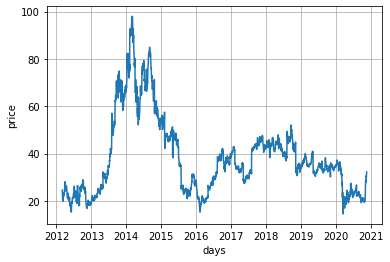

In [16]:
plt.xlabel("days")         
plt.ylabel("price")    
plt.grid()              
plt.plot(YELP.Close)

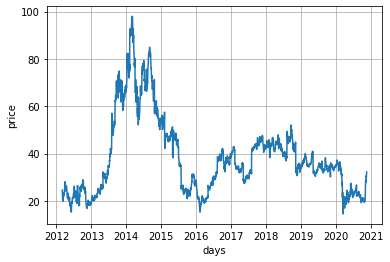

In [17]:
plt.xlabel("days")        
plt.ylabel("price")   
plt.grid()              
plt.plot(YELP.Close)

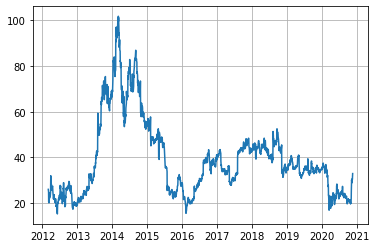

In [18]:
plt.plot(YELP.High)
plt.grid()

In [19]:
YELP.Open

Date
2012-03-02    22.010000
2012-03-05    24.850000
2012-03-06    19.830000
2012-03-07    20.450001
2012-03-08    20.299999
                ...    
2020-11-16    30.299999
2020-11-17    29.910000
2020-11-18    30.010000
2020-11-19    30.610001
2020-11-20    31.340000
Name: Open, Length: 2197, dtype: float64

In [20]:
print(len(YELP.Close))
las100_days = YELP.High[2316:2415]

2197


In [22]:
YELP.Close

Date
2012-03-02    24.580000
2012-03-05    20.990000
2012-03-06    20.500000
2012-03-07    20.250000
2012-03-08    20.000000
                ...    
2020-11-16    30.629999
2020-11-17    29.959999
2020-11-18    30.889999
2020-11-19    31.840000
2020-11-20    32.220001
Name: Close, Length: 2197, dtype: float64

In [24]:
YELP.Low

Date
2012-03-02    22.000000
2012-03-05    20.900000
2012-03-06    19.360001
2012-03-07    19.950001
2012-03-08    19.959999
                ...    
2020-11-16    29.370001
2020-11-17    29.770000
2020-11-18    29.920000
2020-11-19    30.610001
2020-11-20    31.000000
Name: Low, Length: 2197, dtype: float64

In [29]:
YELP.Volume

Date
2012-03-02    4809400
2012-03-05    2988200
2012-03-06    1154300
2012-03-07     444800
2012-03-08     436900
               ...   
2020-11-16    1438300
2020-11-17     888900
2020-11-18    1276800
2020-11-19    1218400
2020-11-20    1345900
Name: Volume, Length: 2197, dtype: int64

In [30]:
YELP.High

Date
2012-03-02    26.000000
2012-03-05    24.860001
2012-03-06    20.500000
2012-03-07    20.629999
2012-03-08    20.389999
                ...    
2020-11-16    30.670000
2020-11-17    30.340000
2020-11-18    31.490000
2020-11-19    32.209999
2020-11-20    32.910000
Name: High, Length: 2197, dtype: float64

In [32]:
YELP.Open

Date
2012-03-02    22.010000
2012-03-05    24.850000
2012-03-06    19.830000
2012-03-07    20.450001
2012-03-08    20.299999
                ...    
2020-11-16    30.299999
2020-11-17    29.910000
2020-11-18    30.010000
2020-11-19    30.610001
2020-11-20    31.340000
Name: Open, Length: 2197, dtype: float64

In [33]:
YELP.all

<bound method DataFrame.all of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.220001  13

In [35]:
YELP.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [36]:
YELP.abs

<bound method NDFrame.abs of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.220001  1345

In [37]:
YELP.add

<bound method _arith_method_FRAME.<locals>.f of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.2200

In [38]:
YELP.add_prefix

<bound method NDFrame.add_prefix of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.22000

In [39]:
YELP.add_suffix

<bound method NDFrame.add_suffix of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.22000

In [40]:
YELP.agg

<bound method DataFrame.aggregate of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.2200

In [41]:
YELP.any

<bound method DataFrame.any of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.220001  13

In [42]:
YELP.append

<bound method DataFrame.append of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.220001 

In [43]:
YELP.append

<bound method DataFrame.append of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.220001 

In [44]:
YELP.append

<bound method DataFrame.append of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.220001 

In [45]:
YELP.apply

<bound method DataFrame.apply of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.220001  

In [46]:
YELP.applymap

<bound method DataFrame.applymap of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.22000

In [47]:
YELP.asfreq

<bound method NDFrame.asfreq of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-03-02  22.010000  26.000000  22.000000  24.580000  24.580000  4809400
2012-03-05  24.850000  24.860001  20.900000  20.990000  20.990000  2988200
2012-03-06  19.830000  20.500000  19.360001  20.500000  20.500000  1154300
2012-03-07  20.450001  20.629999  19.950001  20.250000  20.250000   444800
2012-03-08  20.299999  20.389999  19.959999  20.000000  20.000000   436900
...               ...        ...        ...        ...        ...      ...
2020-11-16  30.299999  30.670000  29.370001  30.629999  30.629999  1438300
2020-11-17  29.910000  30.340000  29.770000  29.959999  29.959999   888900
2020-11-18  30.010000  31.490000  29.920000  30.889999  30.889999  1276800
2020-11-19  30.610001  32.209999  30.610001  31.840000  31.840000  1218400
2020-11-20  31.340000  32.910000  31.000000  32.220001  32.220001  1